## Social Network Ads Challenges Prediction using Random Forest Classifier Approach

#### Part 1: Data Preprocessing

In [92]:
# import the libraries
import numpy as np                 # used for multi dimensional array
import pandas as pd                # used for import the dataset
import matplotlib.pyplot as plt        # used for plot the graph

In [94]:
#import the dataset
dataset = pd.read_csv('/content/Breast Cancer Up Sampling.csv')
X = dataset.iloc[:,[2, 3]].values    # predictor attribute
y = dataset.iloc[:,-1].values        # target attribute

In [95]:
dataset.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [96]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [97]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

#### Part 2: Building the Model

In [98]:
# import random forest classifier model from scikit learn
from sklearn.ensemble import RandomForestClassifier

In [99]:
# initialize the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [100]:
# fit the train data into our model
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [101]:
print(y_test)

[1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 1 1 2 1 1 1 2 1 2 1 1]


#### Part 3: Making a Prediction and Visulaize the result

In [102]:
# Making a prediction
y_pred = classifier.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2])

In [103]:
# Making a confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[7, 9],
       [7, 3]])

In [104]:
# Accuracy result
from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test, y_pred)
ac

0.38461538461538464

In [105]:
from sklearn.metrics import precision_score
pc=precision_score(y_test, y_pred)
pc

0.5

In [106]:
from sklearn.metrics import f1_score
fc=f1_score(y_test, y_pred)
fc

0.4666666666666667

In [107]:
from sklearn.metrics import recall_score
rc=recall_score(y_test, y_pred)
rc

0.4375

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.44      0.47        16
           2       0.25      0.30      0.27        10

    accuracy                           0.38        26
   macro avg       0.38      0.37      0.37        26
weighted avg       0.40      0.38      0.39        26



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


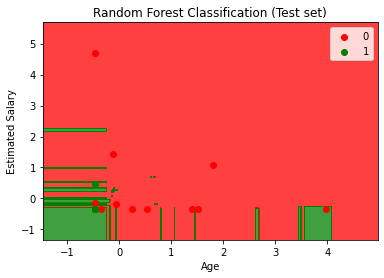

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()